In [1]:
from copulae1 import *

Empirical Illustration

We consider the daily returns of Bitcoin, the Bitcoin CME future, and CRIX over the period of . An attractive feature of the copula is that the marginal distributions and the dependence structure can be modelled and estimated spearately. There are vast literatures about modelling an univariate financial asset returns for different purposes, To name a few,  parametric ones including AR models, GARCH, Generalised hyperbolic, Levy processes. Since this study is about hedging dependence, we impose minimal structure to the marginal distribution by using empirical CDF and kernel density estimation. 

The empirical CDF

kernel density estimation

We use Gaussian kernel $formula$ with bandwidth selected from LOO MLE (ref). 

Test of autocorrelation suggest no autocorrelation in the log return data. 

The rank correlation between Bitcoin and CME future is with a 90% bootstrap confidence interval of [a,b], tau between CRIX and CME future is X with CI of [a,b], indicating that the dependence between these series is positive and relatively strong. The upper panel of Fig.1 presents the estimated quantile dependence for $q\in [0.025, 0.975]$ together with 90% pointwise CI. Quantile denpednece is the probability of concordance conditioned on $q$. The quantile dependence $\lambda^L(q) = \frac{\mathbb{P}(U > q, V > q)}{1-q}$ for $q \in [0,0.5)$, $\lambda^U(q) = \frac{\mathbb{P}(U \leq q, V \leq q)}{q}$ for 
$q \in (0.5,1]$. $\lambda^U(q)$ and $\lambda^L(q)$ is also known as upper quantile dependence ad lower quantile dependence respectively. Observe the upper panel of figure 1, the quantile dependence is higher in the center but lower in the tails. Similar observation can be seen is the quantile dependence of SP100 and SP600, see Patton (2012). 

Futhermore, the CI is narrower in the center of distribution (around the median) but wider near the tails. The wide CIs in the two tails suggest a high uncertainty in the dependence of extreme events (extreme price movements). 

The quantile dependence is not skew, i.e. the upper and lower quantile dependence is in a similar level. 

A review of copula models for economic time series

Patton (2012) Journal of Multivariate Analysis


In [2]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [3]:
q_arr = np.linspace(0.01,.99,50)
L_arr = []

for _ in range(2000):
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    L = np.array([empirical_lambda(_u,_v,q) for q in q_arr])
    L_arr.append(L)
    
L_arr = np.array(L_arr)

Text(0.5, 0, '$q$')

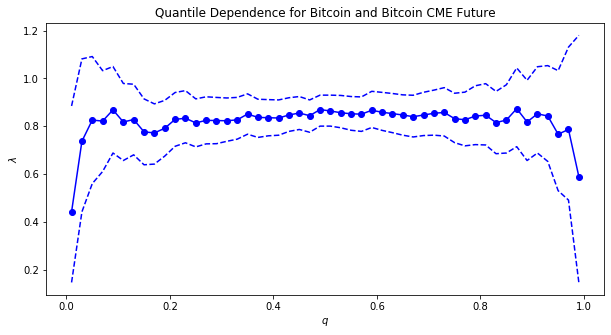

In [4]:
plt.figure(figsize=(10,5))
LQ = np.quantile(np.array(L_arr), 0.05, axis=0)
UQ = np.quantile(np.array(L_arr), 0.95, axis=0)
plt.plot(q_arr, LQ , 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.5, axis=0), 'b-o')
plt.plot(q_arr, UQ, 'b--')
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$q$')
# plt.fill_between(q_arr, LQ, UQ, alpha=.1)


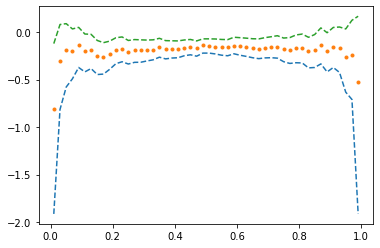

In [5]:
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.05, axis=0)), '--')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.5, axis=0)), '.')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.95, axis=0)), '--')

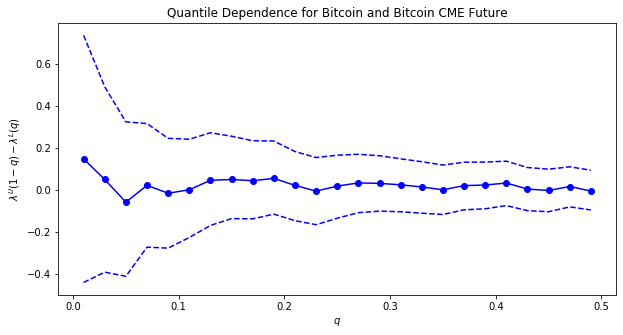

In [6]:
plt.figure(figsize=(10,5))
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda^U(1-q) - \lambda^L(q)$')
plt.xlabel(r'$q$')

D = np.flip(L_arr[:,25:]) - (L_arr[:,:25]) 
plt.plot(q_arr[:25], np.quantile(D, 0.05, axis=0), 'b--')
plt.plot(q_arr[:25], np.quantile(D, 0.5, axis=0), 'b-o')
plt.plot(q_arr[:25], np.quantile(D, 0.95, axis=0), 'b--')

In [7]:
para_arr = []
C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    C.canonical_calibrate(_u,_v)
    para_arr.append(C.rho)


0
Optimization terminated successfully.
         Current function value: -0.912955
         Iterations: 32
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: -0.985199
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1.050701
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.884745
         Iterations: 30
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.896690
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.914738
         Iterations: 32
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -0.975260
         Iterations: 30
         Function evaluations: 62
Optimization terminated s

Optimization terminated successfully.
         Current function value: -0.940343
         Iterations: 30
         Function evaluations: 63
60
Optimization terminated successfully.
         Current function value: -0.868398
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.927108
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.941855
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.956919
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.893637
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1.051499
         Iterations: 31
         Function evaluations: 66
Optimization terminated 

Optimization terminated successfully.
         Current function value: -0.896376
         Iterations: 30
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.996067
         Iterations: 31
         Function evaluations: 66
120
Optimization terminated successfully.
         Current function value: -0.994239
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.870734
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.920598
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.957109
         Iterations: 30
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -0.920859
         Iterations: 30
         Function evaluations: 64
Optimization terminated

Optimization terminated successfully.
         Current function value: -0.979939
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.913893
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.939686
         Iterations: 30
         Function evaluations: 63
180
Optimization terminated successfully.
         Current function value: -0.928529
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.955612
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.921104
         Iterations: 30
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.966691
         Iterations: 30
         Function evaluations: 63
Optimization terminated

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb780a1cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb780b12790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb780a1cf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb780b12bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb780b23710>],
 'means': []}

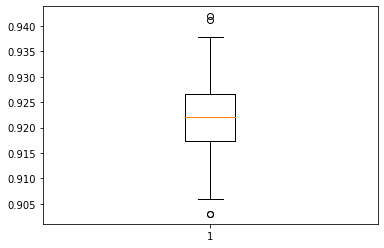

In [8]:
plt.boxplot(para_arr)

In [9]:
para_arr_MM = []
para_arr_MLE = []
para_0 = {'theta':10}
C = Clayton(para_0, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = ECDF(brr[_id])(brr[_id])
    _v = ECDF(btc[_id])(btc[_id])
    C.__init__(para_0, C.Law_RS, C.Law_RF)
    C.canonical_calibrate(_u,_v)
    para_arr_MLE.append(C.theta)
    C.mm_calibrate(_u,_v, [0.05,0.1,0.9,0.95])
    para_arr_MM.append(C.theta)
    
para_arr_MM = np.array(para_arr_MM)
para_arr_MLE = np.array(para_arr_MLE)

0
Optimization terminated successfully.
         Current function value: -0.864479
         Iterations: 41
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.070755
         Iterations: 46
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.846186
         Iterations: 40
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.160303
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.790503
         Iterations: 41
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.098398
         Iterations: 44
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: -0.880618
         Iterations: 40
         Function evaluations: 87
Optimization terminated su

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:393: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(part1 * part2))


Optimization terminated successfully.
         Current function value: 0.122105
         Iterations: 46
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.907141
         Iterations: 41
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.109761
         Iterations: 46
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.803186
         Iterations: 40
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.129418
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.907273
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.094326
         Iterations: 47
         Function evaluations: 104
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -0.746889
         Iterations: 41
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.195084
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.856913
         Iterations: 41
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.106711
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.853098
         Iterations: 39
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.098413
         Iterations: 45
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.868171
         Iterations: 39
         Function evaluations: 87
Optimization terminated suc

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:392: RuntimeWarning: divide by zero encountered in power
  part2 = (-1 + u ** (-theta) + v ** (-theta)) ** (-2 - (1 / theta))
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:393: RuntimeWarning: invalid value encountered in multiply
  return np.mean(np.log(part1 * part2))


Optimization terminated successfully.
         Current function value: -0.919770
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.084627
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.798772
         Iterations: 40
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.120933
         Iterations: 48
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.783393
         Iterations: 41
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.143686
         Iterations: 44
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: -0.786270
         Iterations: 39
         Function evaluations: 84
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -0.737666
         Iterations: 41
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.177032
         Iterations: 44
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: -0.876868
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.129179
         Iterations: 47
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.716217
         Iterations: 42
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.134392
         Iterations: 44
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.901860
         Iterations: 40
         Function evaluations: 85
Optimization terminated succe

Optimization terminated successfully.
         Current function value: -0.843360
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.123994
         Iterations: 46
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: -0.778201
         Iterations: 41
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.128368
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.734106
         Iterations: 42
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.153153
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.946037
         Iterations: 41
         Function evaluations: 89
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -0.849433
         Iterations: 41
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.079870
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.778512
         Iterations: 40
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.142519
         Iterations: 46
         Function evaluations: 101
160
Optimization terminated successfully.
         Current function value: -0.719651
         Iterations: 40
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.152893
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.987261
         Iterations: 41
         Function evaluations: 86
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.127952
         Iterations: 47
         Function evaluations: 103
190
Optimization terminated successfully.
         Current function value: -0.858889
         Iterations: 40
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.103060
         Iterations: 45
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.846885
         Iterations: 41
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.110719
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.745639
         Iterations: 41
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.134229
         Iterations: 48
         Function evaluations: 106
Optimization terminated

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb780c27810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb780c27750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb780c1aad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb780c2bcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb780c2bbd0>,
 'means': []}

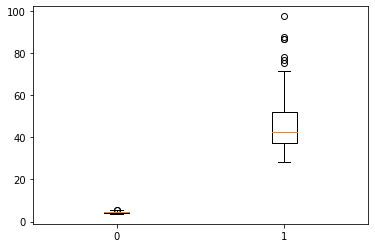

In [10]:
# plt.boxplot(para_arr_MM)

tau_MLE = para_arr_MLE/(para_arr_MLE+2)
tau_MM = para_arr_MM/(para_arr_MM+2)

# tau_MLE = (para_arr_MLE-1)/para_arr_MLE
# tau_MM = (para_arr_MM-1)/para_arr_MM
# plt.boxplot([tau_MLE,tau_MM], positions=[0,1])

plt.boxplot([para_arr_MLE,para_arr_MM], positions=[0,1])

In [11]:
np.mean(para_arr_MLE)/np.std(para_arr_MLE)

12.384996695696636

In [12]:
np.mean(para_arr_MM)/np.std(para_arr_MM)

3.6845326027354592

Optimization terminated successfully.
         Current function value: -0.943696
         Iterations: 32
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.008934
         Iterations: 33
         Function evaluations: 68


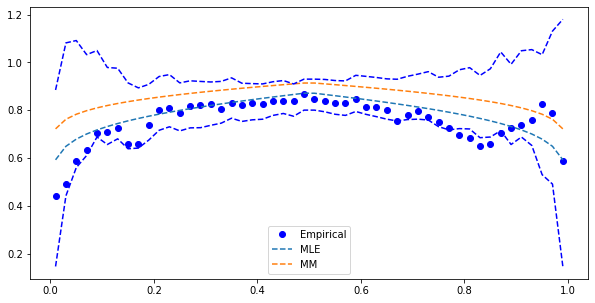

In [13]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")

plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')

plt.legend()

Optimization terminated successfully.
         Current function value: -1.073506
         Iterations: 133
         Function evaluations: 254
{'rho': 0.9338455764163489, 'nu': 2.0000000000001052}
Optimization terminated successfully.
         Current function value: 0.002347
         Iterations: 109
         Function evaluations: 201
{'rho': 0.9387028283435905, 'nu': 2.0000000000016938}


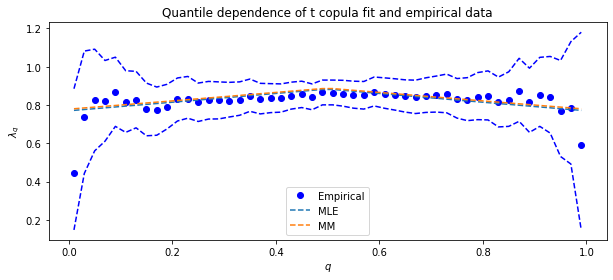

In [14]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C.canonical_calibrate(u,v)
print(C.paras)

L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C.mm_calibrate(u,v,[0.05,0.3,0.7,0.95])
print(C.paras)

L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of t copula fit and empirical data')


plt.savefig('../latex/_pics/t Copula quantile dependence.pdf', transparent=True)

Optimization terminated successfully.
         Current function value: -0.999565
         Iterations: 39
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.038363
         Iterations: 39
         Function evaluations: 85


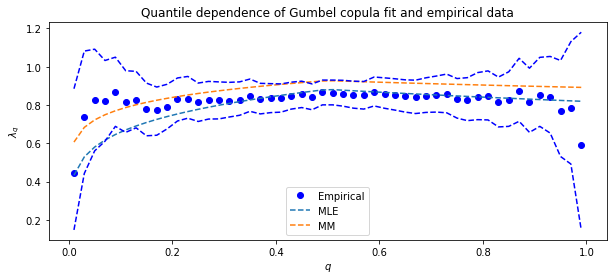

In [15]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Gumbel copula fit and empirical data')

plt.savefig('../latex/_pics/Gumbel Copula quantile dependence.pdf', transparent=True)

Optimization terminated successfully.
         Current function value: -0.827703
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.095431
         Iterations: 47
         Function evaluations: 105


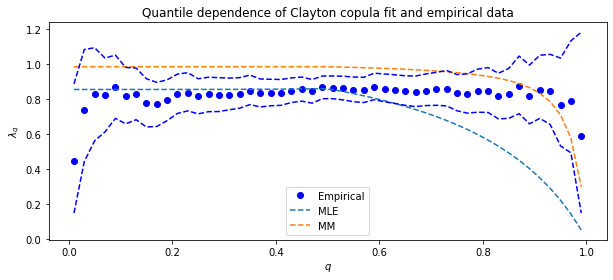

In [16]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Clayton({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Clayton({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Clayton copula fit and empirical data')

plt.savefig('../latex/_pics/Clayton Copula quantile dependence.pdf', transparent=True)

In [29]:
NIG_QD = pd.read_csv('../_mathematica/data/QuantileDependence.csv', header=None)
NIG_QD

,0,1
0,0.01,0.823939
1,0.03,0.829061
2,0.05,0.833792
3,0.07,0.838368
4,0.09,0.842843
5,0.11,0.847230
6,0.13,0.851530
7,0.15,0.855737
8,0.17,0.859844
9,0.19,0.863846


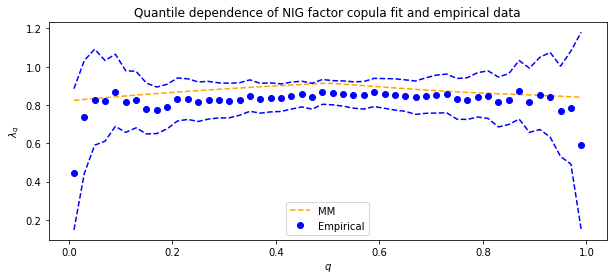

In [37]:
plt.figure(figsize=(10,4))
plt.plot(NIG_QD.loc[:,0], NIG_QD.loc[:,1], '--', label="MM", color='orange')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.plot(q_arr, L, 'bo', label='Empirical')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of NIG factor copula fit and empirical data')
plt.savefig('../latex/_pics/NIG factor Copula quantile dependence.png', transparent=True)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Frank({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Frank({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()